## NOTEBOOK POWER BI PROJECT

## ESSOH Lath
**M2 DS2E**

## Webscraping of 50 financial assets grouped into 10 sectors on Yahoo Finance :

- **Technology**: `AAPL`, `MSFT`, `NVDA`, `ORCL`, `INTC`
- **Finance**: `JPM`, `BAC`, `C`, `GS`, `WFC`
- **Healthcare**: `UNH`, `BAX`, `PFE`, `ABBV`, `MRK`
- **Consumer Discretionary**: `TSLA`, `AMZN`, `HD`, `NKE`, `SBUX`
- **Energy**: `XOM`, `CVX`, `SLB`, `COP`, `SHEL`
- **Materials**: `LIN`, `BHP`, `RIO`, `APD`, `NEM`
- **Communication Services**: `GOOGL`, `DIS`, `T`, `TMUS`, `VZ`
- **Industrials**: `BA`, `CAT`, `HON`, `LMT`, `EMR`
- **Utilities**: `NEE`, `DUK`, `SO`, `EXC`, `XEL`
- **Real Estate**: `AMT`, `PSA`, `SPG`, `EQIX`, `WELL`

## Financial Asset Information

For each financial asset, the following information is provided:

- **Ticker**: The symbol or unique code used to identify the financial asset on the market
- **Sector**: The economic sector to which the financial asset belongs (e.g., technology, healthcare, energy, etc.)
- **Date**: The date of the financial data (typically the date of the trade or exchange)
- **Open**: The price at which the asset opened at the beginning of the trading day
- **High**: The highest price reached by the asset during the day
- **Low**: The lowest price reached by the asset during the day
- **Close**: The price at which the asset closed at the end of the trading day
- **Adj Close**: The adjusted closing price, which accounts for dividends, stock splits, and other events that may affect the price

## More detailed information :

### Technology
- **Apple Inc.** (`AAPL`)
- **Microsoft Corp.** (`MSFT`)
- **NVIDIA Corp.** (`NVDA`)
- **Oracle Corp.** (`ORCL`)
- **Intel Corp.** (`INTC`)

### Finance
- **JPMorgan Chase & Co.** (`JPM`)
- **Bank of America Corp.** (`BAC`)
- **Citigroup Inc.** (`C`)
- **Goldman Sachs Group Inc.** (`GS`)
- **Wells Fargo & Co.** (`WFC`)

### Healthcare
- **UnitedHealth Group Inc.** (`UNH`)
- **Medtronic Plc.** (`MDT`)
- **Pfizer Inc.** (`PFE`)
- **AbbVie Inc.** (`ABBV`)
- **Merck & Co., Inc.** (`MRK`)

### Consumer discretionary
- **Tesla Inc.** (`TSLA`)
- **Amazon.com Inc.** (`AMZN`)
- **The Home Depot, Inc.** (`HD`)
- **Nike Inc.** (`NKE`)
- **Starbucks Corp.** (`SBUX`)

### Energy
- **Exxon Mobil Corp.** (`XOM`)
- **Chevron Corp.** (`CVX`)
- **Schlumberger Ltd.** (`SLB`)
- **ConocoPhillips** (`COP`)
- **Shell plc** (`SHEL`)

### Base materials
- **Linde plc** (`LIN`)
- **BHP Group Ltd.** (`BHP`)
- **Rio Tinto Group** (`RIO`)
- **Air Products and Chemicals, Inc.** (`APD`)
- **Newmont Corp.** (`NEM`)

### Communication services
- **Alphabet Inc. (Google)** (`GOOGL`)
- **The Walt Disney Co.** (`DIS`)
- **AT&T Inc.** (`T`)
- **T-Mobile US, Inc.** (`TMUS`)
- **Verizon Communications Inc.** (`VZ`)

### Industrials
- **The Boeing Co.** (`BA`)
- **Caterpillar Inc.** (`CAT`)
- **Honeywell International Inc.** (`HON`)
- **Lockheed Martin Corp.** (`LMT`)
- **Emerson Electric Co.** (`EMR`)

### Public services (Utilities)
- **NextEra Energy Inc.** (`NEE`)
- **Duke Energy Corp.** (`DUK`)
- **The Southern Co.** (`SO`)
- **Exelon Corp.** (`EXC`)
- **Xcel Energy Inc.** (`XEL`)

### Real estate
- **American Tower Corp.** (`AMT`)
- **Public Storage, Inc.** (`PSA`)
- **Simon Property Group Inc.** (`SPG`)
- **Equinix Inc.** (`EQIX`)
- **Welltower Inc.** (`WELL`)

## Indicators Created for Financial Data

The following financial indicators are created based on the original data (such as `Date`, `Open`, `High`, `Low`, `Close`, `Adj_Close`, and `Volume`), and calculations are performed using `pandas` in Python:

### 1. **Data Preparation**

#### Reset Index and Rename Columns:
- **`df.reset_index(inplace=True)`**: Resets the index of the DataFrame
- **`df.rename(columns={"Date": "Date", "Adj Close": "Adj_Close"}, inplace=True)`**: Renames the "Adj Close" column to "Adj_Close" (making sure it's consistent)

#### Volume Cleaning and Imputation:
- **Volume cleaning**: Removes commas from the `Volume` column and converts it to float:
  - **`df['Volume'] = df['Volume'].replace({',': ''}, regex=True).astype(float)`**
- **Missing values in `Volume`**: Fills missing values in the `Volume` column with the median value:
  - **`df['Volume'] = df['Volume'].fillna(df['Volume'].median())`**

---

### 2. **Calculated Financial Indicators**

#### Daily Change (%):
- **`df['Daily Change (%)'] = (df['Adj_Close'] - df['Open']) / df['Open'] * 100`**  
  This calculates the percentage change from the `Open` price to the `Adj_Close` price for each day

#### Intraday Volatility:
- **`df['Intraday Volatility'] = df['High'] - df['Low']`**  
  This measures the difference between the highest and lowest price of the asset during the trading day

#### Daily Return:
- **`df['Daily Return'] = df['Adj_Close'].pct_change()`**  
  The daily return is calculated as the percentage change from the previous day's adjusted close to the current day's adjusted close

---

### 3. **Moving Averages**

#### Simple Moving Averages (SMA):
- **`df['SMA_20'] = df['Adj_Close'].rolling(window=20).mean()`**  
  20-day simple moving average
- **`df['SMA_50'] = df['Adj_Close'].rolling(window=50).mean()`**  
  50-day simple moving average

#### Exponential Moving Averages (EMA):
- **`df['EMA_12'] = df['Adj_Close'].ewm(span=12, adjust=False).mean()`**  
  12-day exponential moving average
- **`df['EMA_26'] = df['Adj_Close'].ewm(span=26, adjust=False).mean()`**  
  26-day exponential moving average

#### Shorter Period Moving Averages:
- **`df['MA_7'] = df['Adj_Close'].rolling(window=7).mean()`**  
  7-day moving average
- **`df['MA_30'] = df['Adj_Close'].rolling(window=30).mean()`**  
  30-day moving average

---

### 4. **MACD (Moving Average Convergence Divergence)**

- **`df['MACD'] = df['EMA_12'] - df['EMA_26']`**  
  The MACD is calculated by subtracting the 26-day EMA from the 12-day EMA
  
- **`df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()`**  
  The Signal Line is the 9-day EMA of the MACD

---

### 5. **RSI (Relative Strength Index)**

- **`delta = df['Adj_Close'].diff()`**: The difference between each day's `Adj_Close` and the previous day's `Adj_Close`
- **`gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()`**: The average gain over a 14-day window
- **`loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()`**: The average loss over a 14-day window
- **`rs = gain / loss`**: The relative strength (RS) is the ratio of the average gain to the average loss
- **`df['RSI'] = 100 - (100 / (1 + rs))`**: The RSI is calculated using the formula `100 - (100 / (1 + RS))`. This indicator ranges from 0 to 100 and is used to identify overbought or oversold conditions in a market

---

### 6. **Volatility Indicators**

#### Short-Term Volatility (7-day and 21-day):
- **`df['Volatility_7'] = df['Adj_Close'].rolling(window=7).std()`**: The 7-day rolling standard deviation of `Adj_Close`, which measures short-term volatility
- **`df['Volatility_21'] = df['Adj_Close'].rolling(window=21).std()`**: The 21-day rolling standard deviation of `Adj_Close`, which measures medium-term volatility

#### Normalized Volume:
- **`df['Normalized Volume'] = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()`**  
  The volume is normalized by subtracting the mean and dividing by the standard deviation. This helps to compare volume activity relative to its historical range

---

### 7. **Cumulative Return**

- **`df['Cumulative Return'] = (1 + df['Daily Return']).cumprod() - 1`**  
  This calculates the cumulative return of the asset over time by multiplying the daily returns and subtracting 1 to account for the initial investment


---

### 8. **Bollinger Bands**

- **`df['Bollinger_STD'] = df['Adj_Close'].rolling(window=20).std()`**  
  This calculates the rolling standard deviation of the adjusted close price over a 20-day window. The standard deviation measures the price volatility over the specified period.

- **`df['Bollinger_Upper'] = df['SMA_20'] + (df['Bollinger_STD'] * 2)`**  
  The upper Bollinger Band is calculated by adding two times the standard deviation to the 20-day simple moving average (`SMA_20`). It represents the upper boundary of expected price movements.

- **`df['Bollinger_Lower'] = df['SMA_20'] - (df['Bollinger_STD'] * 2)`**  
  The lower Bollinger Band is calculated by subtracting two times the standard deviation from the `SMA_20`. It serves as the lower boundary of expected price movements.

---

### 9. **VWAP (Volume-Weighted Average Price)**

- **`df['VWAP'] = (df['Adj_Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()`**  
  The VWAP is calculated by dividing the cumulative product of the adjusted close price and volume by the cumulative volume. It represents the average price at which the asset has traded throughout the day, weighted by volume.

---

### 10. **Sectorial Correlations**

#### Aggregation:
- **`sector_daily = df.groupby(['Date', 'Secteur'])['Daily Change (%)'].mean().unstack()`**  
  This step calculates the average daily percentage change for each sector and creates a pivot table with sectors as columns and dates as rows.

- **`sector_correlation = sector_daily.corr()`**  
  This generates a correlation matrix showing how each sector's daily changes relate to one another. A high correlation (close to 1) implies that the sectors move in tandem, while a low or negative correlation suggests divergent behavior.

#### Transformation for Power BI:
- **`sector_correlation_reset = sector_correlation.reset_index()`**  
  Resets the index of the correlation matrix for easier manipulation.
- **`sector_correlation_long = sector_correlation_reset.melt(id_vars=['Secteur'], var_name='Secteur2', value_name='Correlation')`**  
  Transforms the wide correlation matrix into a long-format table, making it compatible with visualization tools like Power BI.

#### **Summary**:
Sectorial correlations provide insights into how different sectors interact:
- Strong correlations between sectors can indicate shared economic drivers or market conditions.
- Negative correlations can highlight diversification opportunities.
- This analysis is crucial for portfolio construction and risk management.

---

### 11. **Export Data**

The enriched data, along with the sector correlation matrix, is saved into an Excel file for further analysis and use in Power BI:
- **`output_file_name = "financial_assets_data_with_indicators_by_ticker.xlsx"`**  
  The data is saved in multiple sheets within a single Excel file:
  - **`Sheet: Data`**: Contains the enriched financial indicators by ticker
  - **`Sheet: Sector Correlation`**: Contains the sector correlation matrix in long format

---

### Summary of Indicators:

##### **Daily Change (%)**
- Measures the percentage change between the **Open** price and the **Adjusted Close** price on a given day. It provides a quick view of how much the asset has changed during the day

##### **Intraday Volatility**
- The difference between the **High** and **Low** prices during the trading day. It gives an idea of how volatile the asset's price movement was during that day

##### **Daily Return**
- The percentage change in the **Adjusted Close** price compared to the previous day's **Adjusted Close**. It represents the daily performance of the asset

##### **SMA_20, SMA_50** (Simple Moving Averages)
- **SMA_20**: The 20-day moving average of the **Adjusted Close** price. This helps smooth out short-term fluctuations.  
- **SMA_50**: The 50-day moving average, providing a longer-term trend of the asset

##### **EMA_12, EMA_26** (Exponential Moving Averages)
- **EMA_12**: The 12-day exponential moving average of the **Adjusted Close** price, which gives more weight to recent prices.
- **EMA_26**: The 26-day exponential moving average, used to identify longer-term trends

##### **MACD and Signal Line**
- **MACD (Moving Average Convergence Divergence)**: The difference between the **EMA_12** and **EMA_26**. It indicates momentum and trend changes
- **Signal Line**: A 9-day EMA of the MACD, used to identify buy/sell signals when the MACD crosses above or below the Signal Line

##### **RSI (Relative Strength Index)**
- A momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and helps identify whether an asset is overbought (above 70) or oversold (below 30)

##### **Volatility_7, Volatility_21** (Volatility indicators)
- **Volatility_7**: The 7-day rolling standard deviation of the **Adjusted Close** price, indicating short-term price fluctuations
- **Volatility_21**: The 21-day rolling standard deviation, capturing longer-term volatility

##### **Normalized Volume**
- The volume of trades normalized by subtracting the mean and dividing by the standard deviation, making it easier to compare volume activity relative to historical norms

##### **Cumulative Return**
- The cumulative return calculates the total percentage change in the asset's value from the start of the period to the current day, reflecting the overall growth of the investment

##### **Bollinger Bands**:
Bollinger Bands are used to measure price volatility and identify overbought or oversold conditions:
- When the price touches the upper band, the asset may be considered overbought.
- When the price touches the lower band, the asset may be considered oversold.
- A narrow band indicates low volatility, while a wide band suggests high volatility.

##### **VWAP**:
The VWAP is commonly used as a benchmark for institutional traders:
- If the price is above the VWAP, it may indicate bullish sentiment.
- If the price is below the VWAP, it may indicate bearish sentiment.
- It is often used to assess the efficiency of trade executions and to identify trends during intraday trading.

---
These indicators provide insights into price trends, momentum, volatility, and trading activity, helping analysts and investors make informed decisions based on the asset's performance over time

### Webscraping using selenium, a webdriver and XPath selectors

In [53]:
pip install --upgrade webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [98]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

options = webdriver.ChromeOptions()
options.add_argument("--headless") 
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-gpu")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

actions_par_secteur = {
    "Technology": ["AAPL", "MSFT", "NVDA", "ORCL", "INTC"],
    "Finance": ["JPM", "BAC", "C", "GS", "WFC"],
    "Healthcare": ["UNH", "BAX", "PFE", "ABBV", "MRK"], 
    "Consumer Discretionary": ["TSLA", "AMZN", "HD", "NKE", "SBUX"],
    "Energy": ["XOM", "CVX", "SLB", "COP", "SHEL"],
    "Basic Materials": ["LIN", "BHP", "RIO", "APD", "NEM"],
    "Communication Services": ["GOOGL", "DIS", "T", "TMUS", "VZ"], 
    "Industrials": ["BA", "CAT", "HON", "LMT", "EMR"], 
    "Utilities": ["NEE", "DUK", "SO", "EXC", "XEL"],
    "Real Estate": ["AMT", "PSA", "SPG", "EQIX", "WELL"], 
}

all_data = []

try:
    for secteur, tickers in actions_par_secteur.items():
        for ticker in tickers:
            print(f"Scraping pour {ticker} (secteur : {secteur})...")

            url = f"https://finance.yahoo.com/quote/{ticker}/history/"
            driver.get(url)

            wait = WebDriverWait(driver, 15)

            try:
                accept_cookies_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[text()='Accepter tout']")))
                accept_cookies_button.click()
                print(f"Cookies acceptés pour {ticker}.")
            except Exception:
                print(f"Pas de bouton cookies détecté pour {ticker}.")

            print(f"Recherche du tableau des données pour {ticker}...")
            try:
                table = wait.until(EC.visibility_of_element_located((By.XPATH, "//*[@id='nimbus-app']/section/section/section/article/div[1]/div[3]/table")))
                rows = table.find_elements(By.XPATH, ".//tbody/tr")

                print(f"{len(rows)} lignes trouvées pour {ticker}.")
            except Exception as e:
                print(f"Erreur lors de la récupération du tableau pour {ticker}: {e}")
                continue

            data = []
            for row in rows:
                cols = row.find_elements(By.TAG_NAME, "td")
                if len(cols) == 7:  
                    date = cols[0].text
                    open_price = cols[1].text
                    high = cols[2].text
                    low = cols[3].text
                    close = cols[4].text
                    adj_close = cols[5].text
                    volume = cols[6].text
                    data.append([ticker, secteur, date, open_price, high, low, close, adj_close, volume])

            all_data.extend(data)

except Exception as e:
    print(f"Erreur globale lors du scraping : {e}")

finally:
    driver.quit()

if all_data:
    df = pd.DataFrame(all_data, columns=["Ticker", "Secteur", "Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

    columns_to_convert = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
    for col in columns_to_convert:
        df[col] = df[col].str.replace(',', '').str.replace('-', '').astype(float)

    excel_file_name = "ESSOH_scraped_data.xlsx"
    df.to_excel(excel_file_name, index=False)
    print(f"Données sauvegardées dans le fichier : '{excel_file_name}'.")

Scraping pour AAPL (secteur : Technology)...
Cookies acceptés pour AAPL.
Recherche du tableau des données pour AAPL...
255 lignes trouvées pour AAPL.
Scraping pour MSFT (secteur : Technology)...
Pas de bouton cookies détecté pour MSFT.
Recherche du tableau des données pour MSFT...
255 lignes trouvées pour MSFT.
Scraping pour NVDA (secteur : Technology)...
Pas de bouton cookies détecté pour NVDA.
Recherche du tableau des données pour NVDA...
256 lignes trouvées pour NVDA.
Scraping pour ORCL (secteur : Technology)...
Pas de bouton cookies détecté pour ORCL.
Recherche du tableau des données pour ORCL...
255 lignes trouvées pour ORCL.
Scraping pour INTC (secteur : Technology)...
Pas de bouton cookies détecté pour INTC.
Recherche du tableau des données pour INTC...
254 lignes trouvées pour INTC.
Scraping pour JPM (secteur : Finance)...
Pas de bouton cookies détecté pour JPM.
Recherche du tableau des données pour JPM...
255 lignes trouvées pour JPM.
Scraping pour BAC (secteur : Finance)...
P

### Other option :  Use library yfinance (not used in this project)

In [ ]:
import yfinance as yf
import pandas as pd

actions_par_secteur = {
    "Technology": ["AAPL", "MSFT", "NVDA", "ORCL", "INTC"],
    "Finance": ["JPM", "BAC", "C", "GS", "WFC"],
    "Healthcare": ["UNH", "BAX", "PFE", "ABBV", "MRK"], 
    "Consumer Discretionary": ["TSLA", "AMZN", "HD", "NKE", "SBUX"],
    "Energy": ["XOM", "CVX", "SLB", "COP", "SHEL"],
    "Basic Materials": ["LIN", "BHP", "RIO", "APD", "NEM"],
    "Communication Services": ["GOOGL", "DIS", "T", "TMUS", "VZ"], 
    "Industrials": ["BA", "CAT", "HON", "LMT", "EMR"], 
    "Utilities": ["NEE", "DUK", "SO", "EXC", "XEL"],
    "Real Estate": ["AMT", "PSA", "SPG", "EQIX", "WELL"], 
}

start_date = '1980-01-01'
end_date = '2024-12-21'

all_data = []

for secteur, tickers in actions_par_secteur.items():
    for ticker in tickers:
        print(f"Téléchargement des données pour {ticker} (secteur : {secteur})...")
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            data['Ticker'] = ticker
            data['Secteur'] = secteur
            all_data.append(data)
        except Exception as e:
            print(f"Erreur lors du téléchargement pour {ticker}: {e}")
            
if all_data:
    df = pd.concat(all_data)
    df = df.reset_index()
    columns_order = ['Date', 'Ticker', 'Secteur'] + [col for col in df.columns if col not in ['Date', 'Ticker', 'Secteur']]
    df = df[columns_order]
    excel_file_name = "all_sectors_historical_data.xlsx"
    df.to_excel(excel_file_name, index=False)
    print(f"Toutes les données sauvegardées dans '{excel_file_name}'.")

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("ESSOH_scraped_data.xlsx")

print(df.head())

  Ticker     Secteur          Date    Open    High     Low   Close  Adj Close  \
0   AAPL  Technology  Jan 21, 2025  224.00  224.42  220.80  221.59     221.59   
1   AAPL  Technology  Jan 17, 2025  232.12  232.29  228.48  229.98     229.98   
2   AAPL  Technology  Jan 16, 2025  237.35  238.01  228.03  228.26     228.26   
3   AAPL  Technology  Jan 15, 2025  234.64  238.96  234.43  237.87     237.87   
4   AAPL  Technology  Jan 14, 2025  234.75  236.12  232.47  233.28     233.28   

     Volume  
0  23046743  
1  68247100  
2  71759100  
3  39832000  
4  39435300  


In [90]:
#display(df)

## Data cleanning

In [10]:
print(df.isnull().sum())

Ticker       0
Secteur      0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [12]:
df.reset_index(inplace=True)
df.rename(columns={"Date": "Date", "Adj Close": "Adj_Close"}, inplace=True)

In [14]:
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close']] = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close']].replace({',': ''}, regex=True).astype(float)

In [35]:
df = df.drop_duplicates()

In [ ]:
#df['Volume'] = df['Volume'].replace({',': ''}, regex=True).astype(float)
#df['Volume'] = df['Volume'].fillna(df['Volume'].median())

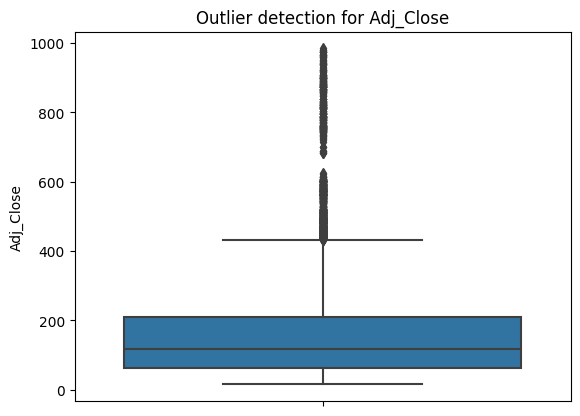

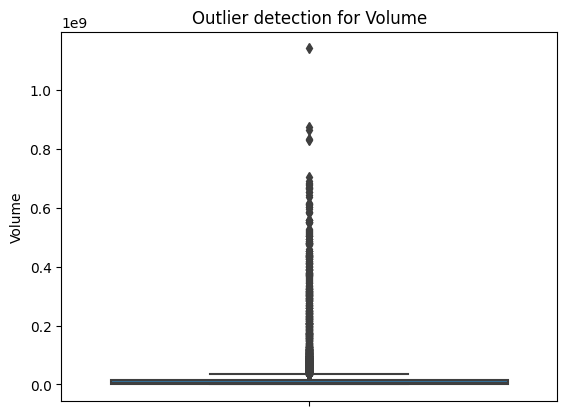

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y='Adj_Close', data=df)
plt.title("Outlier detection for Adj_Close")
plt.show()

sns.boxplot(y='Volume', data=df)
plt.title("Outlier detection for Volume")
plt.show()

## Exploratory Data Analysis (EDA)

### Closing prize distribution

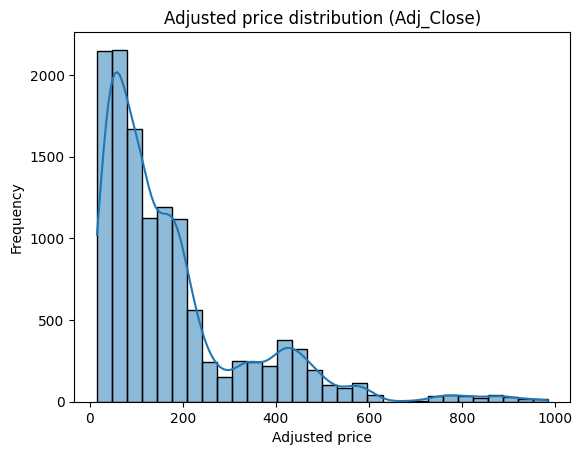

In [18]:
sns.histplot(df['Adj_Close'], bins=30, kde=True)
plt.title("Adjusted price distribution (Adj_Close)")
plt.xlabel("Adjusted price")
plt.ylabel("Frequency")
plt.show()

### Price trends

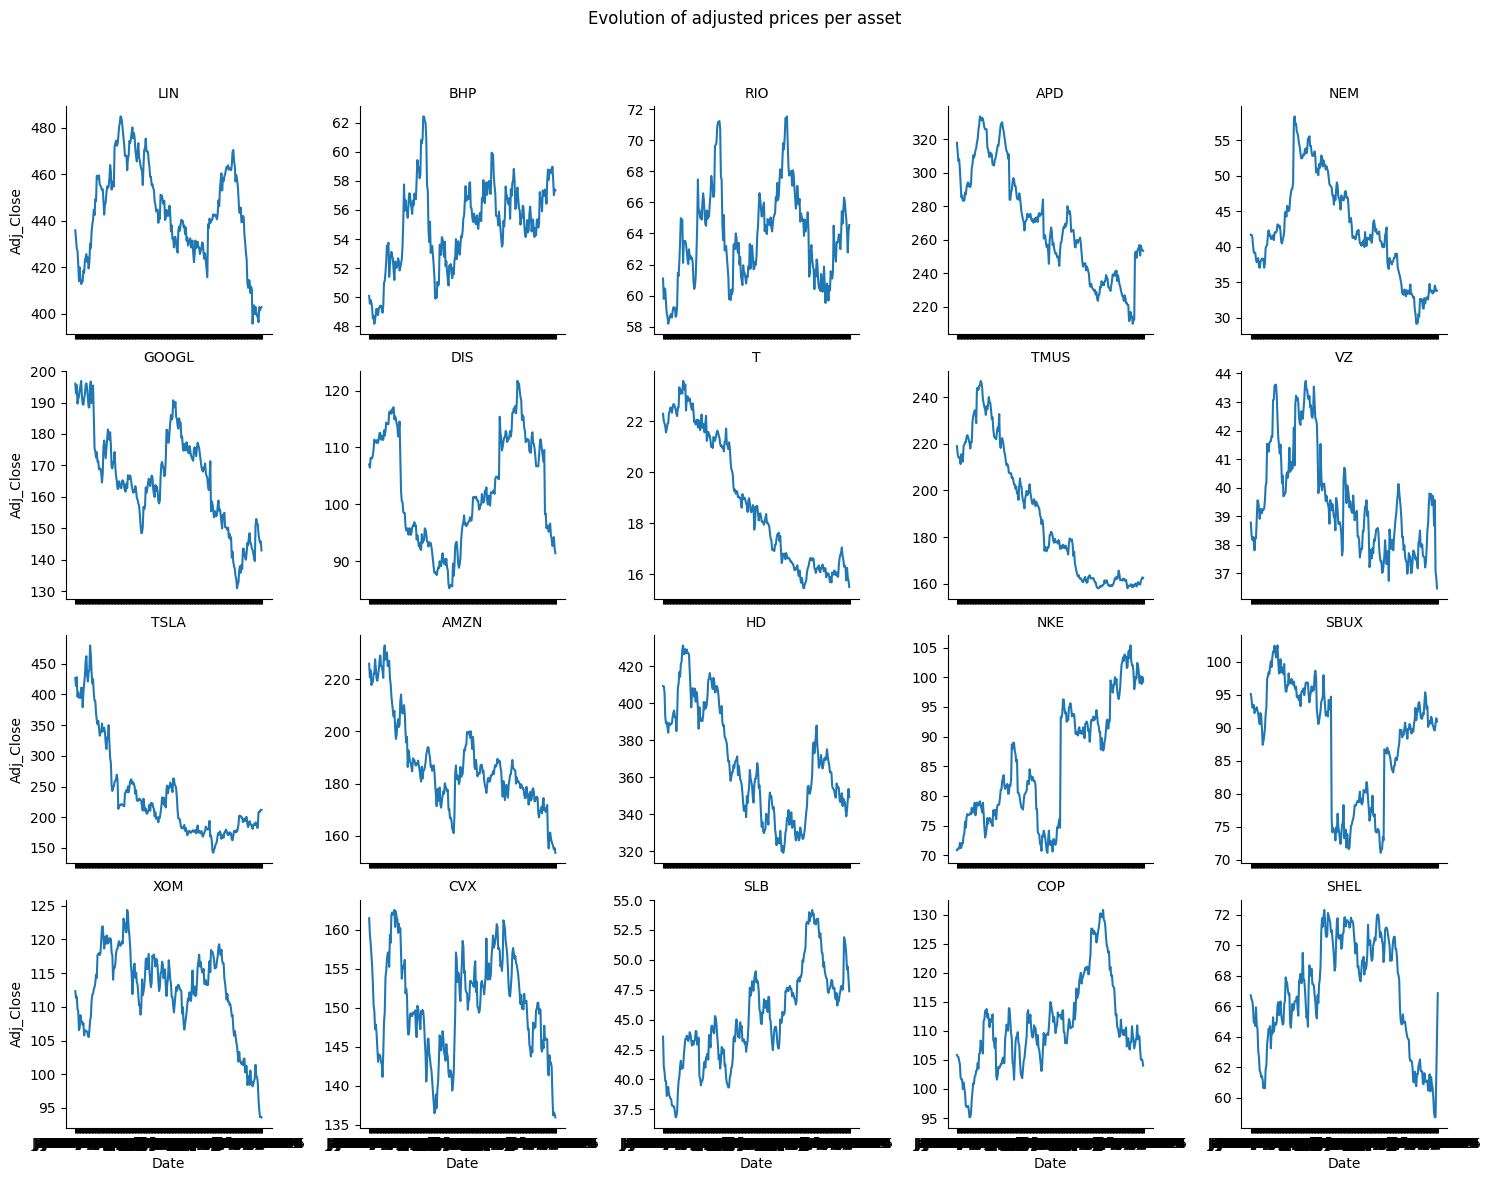

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_tickers = df['Ticker'].unique()[:20]
filtered_df = df[df['Ticker'].isin(filtered_tickers)]

g = sns.FacetGrid(filtered_df, col="Ticker", col_wrap=5, height=3, sharey=False)
g.map(sns.lineplot, 'Date', 'Adj_Close')
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Evolution of adjusted prices per asset")
plt.show()

In [ ]:
top_tickers = df.groupby('Ticker')['Adj_Close'].std().nlargest(10).index
filtered_df = df[df['Ticker'].isin(top_tickers)]

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Adj_Close', hue='Ticker', data=filtered_df)
plt.title("Evolution of adjusted prices per asset (Top 10)")
plt.xlabel("Date")
plt.ylabel("Prix ajusté (Adj_Close)")
plt.legend(title="Actif", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Adj_Close', hue='Ticker', data=df)
plt.title("Evolution of adjusted prices per asset")
plt.xlabel("Date")
plt.ylabel("Prix ajusté (Adj_Close)")
plt.legend(title="Actif")
plt.show()

In [ ]:
import plotly.express as px

fig = px.line(df, x='Date', y='Adj_Close', color='Ticker', title="Evolution of adjusted prices per asset")
fig.show()

### Correlations between variables 

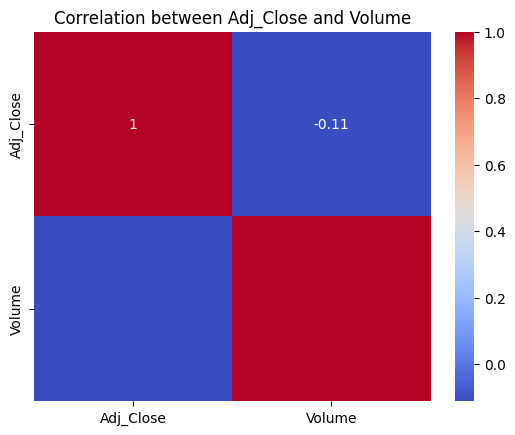

In [53]:
sns.heatmap(df[['Adj_Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Adj_Close and Volume")
plt.show()

### Relationship between Volume and Close

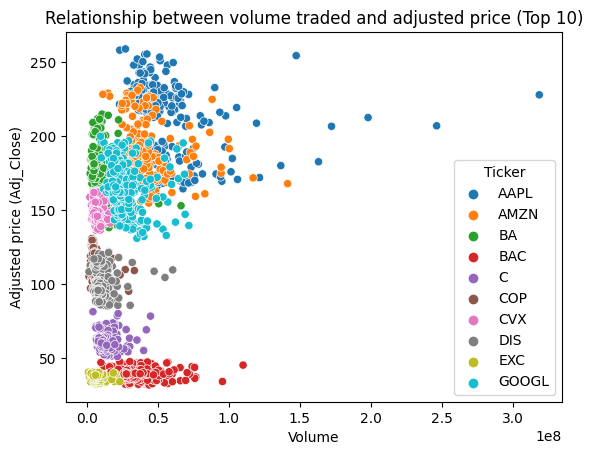

In [34]:
top_10_df = filtered_df.groupby('Ticker').agg({'Volume': 'mean', 'Adj_Close': 'mean'}).nlargest(10, 'Volume')

top_10_filtered_df = filtered_df[filtered_df['Ticker'].isin(top_10_df.index)]

sns.scatterplot(x='Volume', y='Adj_Close', hue='Ticker', data=top_10_filtered_df)

plt.title("Relationship between volume traded and adjusted price (Top 10)")
plt.xlabel("Volume")
plt.ylabel("Adjusted price (Adj_Close)")

plt.show()

In [ ]:
sns.scatterplot(x='Volume', y='Adj_Close', hue='Ticker', data=df)
plt.title("Relationship between volume traded and adjusted price ")
plt.xlabel("Volume")
plt.ylabel("Adjusted price (Adj_Close)")
plt.show()

In [57]:
display(df)

,index,Ticker,Secteur,Date,Open,High,Low,Close,Adj_Close,Volume
0,0,LIN,Basic Materials,"Jan 17, 2025",440.00,440.00,433.53,436.00,436.00,2395100.0
1,1,LIN,Basic Materials,"Jan 16, 2025",427.92,432.75,427.65,432.49,432.49,1511600.0
2,2,LIN,Basic Materials,"Jan 15, 2025",433.22,433.92,426.41,427.98,427.98,2202300.0
3,3,LIN,Basic Materials,"Jan 14, 2025",422.28,427.81,420.72,427.29,427.29,2344300.0
4,4,LIN,Basic Materials,"Jan 13, 2025",415.79,422.68,413.70,421.43,421.43,2824500.0
...,...,...,...,...,...,...,...,...,...,...
12594,12594,XEL,Utilities,"Jan 24, 2024",59.52,59.76,58.13,58.22,56.07,6092700.0
12595,12595,XEL,Utilities,"Jan 23, 2024",59.01,59.35,58.75,59.19,57.00,4648400.0
12596,12596,XEL,Utilities,"Jan 22, 2024",59.58,59.94,58.66,58.93,56.75,3858700.0
12597,12597,XEL,Utilities,"Jan 19, 2024",59.67,59.91,59.18,59.48,57.28,3582400.0


## Indicator calculation

In [36]:
# Calculation of indicators by ticker
grouped = df.groupby('Ticker')

def calculate_indicators(group):
    group = group.sort_values(by='Date').reset_index(drop=True) 
    
    # Daily variations
    group['Daily Change (%)'] = (group['Adj_Close'] - group['Open']) / group['Open'] * 100
    group['Intraday Volatility'] = group['High'] - group['Low']
    group['Daily Return'] = group['Adj_Close'].pct_change()

    # Simple and exponential moving averages
    group['SMA_20'] = group['Adj_Close'].rolling(window=20).mean()
    group['SMA_50'] = group['Adj_Close'].rolling(window=50).mean()
    group['EMA_12'] = group['Adj_Close'].ewm(span=12, adjust=False).mean()
    group['EMA_26'] = group['Adj_Close'].ewm(span=26, adjust=False).mean()

    # MACD and signal line
    group['MACD'] = group['EMA_12'] - group['EMA_26']
    group['Signal_Line'] = group['MACD'].ewm(span=9, adjust=False).mean()

    # RSI (Indice de force relative)
    delta = group['Adj_Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / loss
    group['RSI'] = 100 - (100 / (1 + rs))

    # Volatility over 7 and 21 days
    group['Volatility_7'] = group['Adj_Close'].rolling(window=7).std()
    group['Volatility_21'] = group['Adj_Close'].rolling(window=21).std()

    # Normalized volume
    group['Normalized Volume'] = (group['Volume'] - group['Volume'].mean()) / group['Volume'].std()

    # Cumulative return
    group['Cumulative Return'] = (1 + group['Daily Return']).cumprod() - 1

    # Bollinger Bands
    group['Bollinger_STD'] = group['Adj_Close'].rolling(window=20).std()
    group['Bollinger_Upper'] = group['SMA_20'] + (group['Bollinger_STD'] * 2)
    group['Bollinger_Lower'] = group['SMA_20'] - (group['Bollinger_STD'] * 2)

    # VWAP (Volume-Weighted Average Price)
    group['VWAP'] = (group['Adj_Close'] * group['Volume']).cumsum() / group['Volume'].cumsum()

    return group

# Apply function to each group
df_with_indicators = grouped.apply(calculate_indicators).reset_index(drop=True)

# Sector aggregation for correlations
sector_daily = df_with_indicators.groupby(['Date', 'Secteur'])['Daily Change (%)'].mean().unstack()
sector_correlation = sector_daily.corr()

# Transformation to a Power BI-compatible format
sector_correlation_reset = sector_correlation.reset_index()
sector_correlation_long = sector_correlation_reset.melt(id_vars=['Secteur'], var_name='Secteur2', value_name='Correlation')

output_file_name = "ESSOH_data_with_indicators_by_ticker.xlsx"
with pd.ExcelWriter(output_file_name, engine="openpyxl") as writer:
    df_with_indicators.to_excel(writer, sheet_name='Data', index=False)
    sector_correlation_long.to_excel(writer, sheet_name='Sector Correlation', index=False)

print(f"Enriched data and correlation matrix saved in '{output_file_name}'.")

Données enrichies et matrice de corrélation sauvegardées dans 'financial_assets_data_with_indicators_by_ticker.xlsx'.


In [20]:
import pandas as pd
df = pd.read_excel("ESSOH_data_with_indicators_by_ticker.xlsx")

### Relationship between volume traded and daily variation

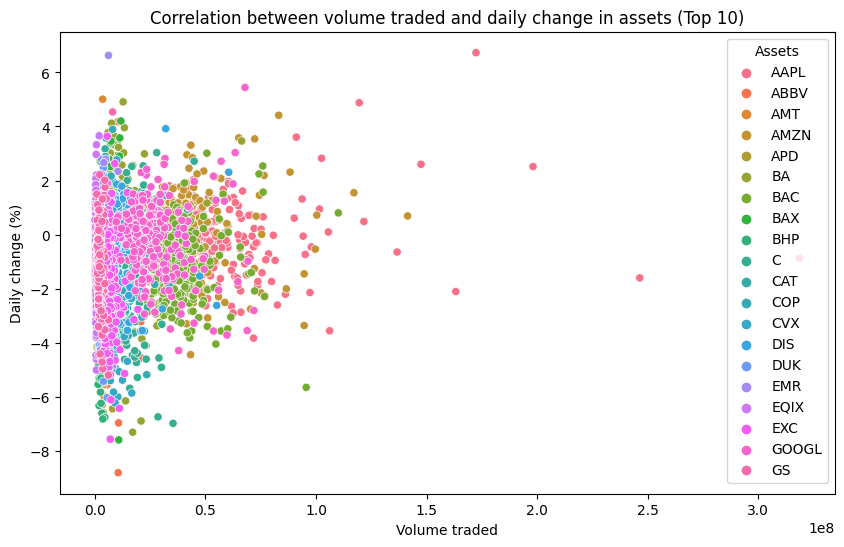

In [22]:
filtered_tickers = df['Ticker'].unique()[:20]
filtered_df = df[df['Ticker'].isin(filtered_tickers)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Daily Change (%)', hue='Ticker', data=filtered_df)
plt.title("Correlation between volume traded and daily change in assets (Top 10)")
plt.xlabel("Volume traded")
plt.ylabel("Daily change (%)")
plt.legend(title="Assets")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Daily Change (%)', hue='Ticker', data=df)
plt.title("Correlation between volume traded and daily change in assets")
plt.xlabel("Volume traded")
plt.ylabel("Daily variation (%)")
plt.legend(title="Assets")
plt.show()

### Volatility heat map by sector and month

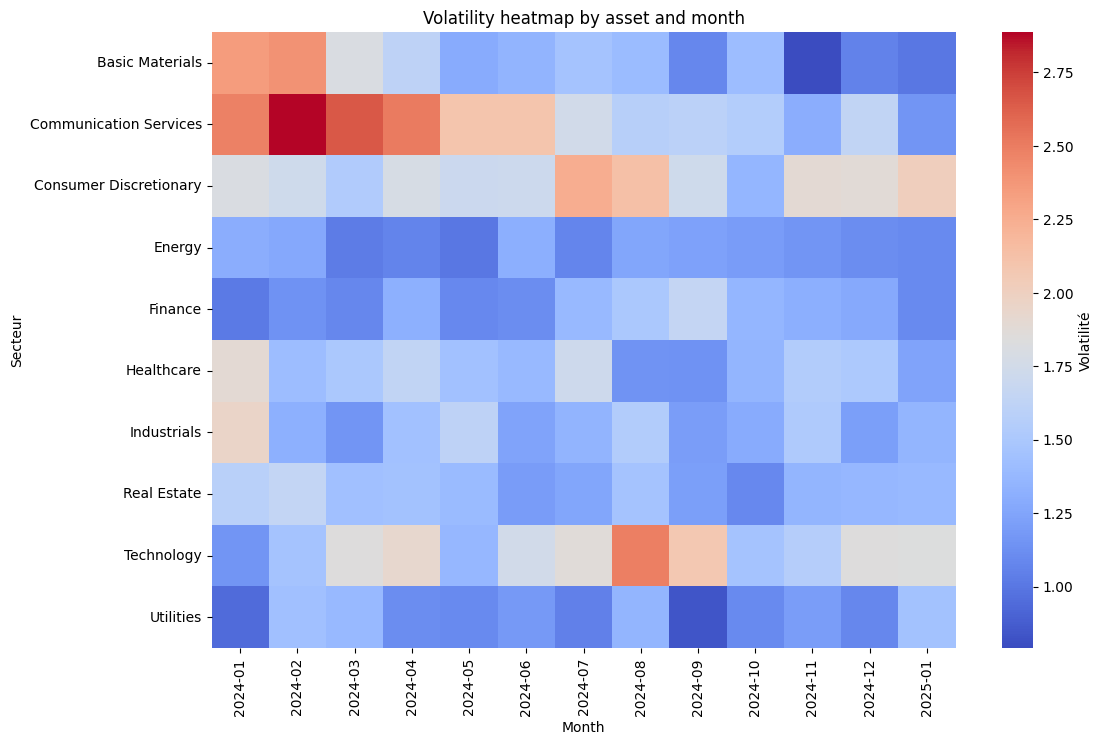

In [24]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if df['Date'].isnull().any():
    print("Some dates could not be converted. Check your data.")

df['Month'] = df['Date'].dt.to_period('M')

heatmap_data = df.groupby(['Secteur', 'Month'])['Daily Change (%)'].std().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar_kws={'label': 'Volatilité'})
plt.title("Volatility heatmap by asset and month")
plt.show()

In [26]:
sector_daily = df.groupby(['Date', 'Secteur'])['Daily Change (%)'].mean().unstack()
print(sector_daily.head())

Secteur     Basic Materials  Communication Services  Consumer Discretionary  \
Date                                                                          
2024-01-22        -2.682636               -2.513029               -2.447364   
2024-01-23        -3.279836               -2.536792               -1.826129   
2024-01-24        -5.808530               -3.550716               -2.387589   
2024-01-25        -3.472530               -1.637826               -2.120899   
2024-01-26        -4.144783               -2.208819               -1.061479   

Secteur       Energy   Finance  Healthcare  Industrials  Real Estate  \
Date                                                                   
2024-01-22 -2.514587 -2.161299   -2.729111    -0.935114    -3.576462   
2024-01-23 -2.945306 -2.214194   -2.775373    -2.787665    -4.146104   
2024-01-24 -2.287419 -2.722156   -4.324113    -2.246574    -5.528637   
2024-01-25 -1.901748 -2.273993   -2.207817    -1.340516    -3.316444   
2024-01-26 -2.

In [28]:
sector_correlation = sector_daily.corr()
print(sector_correlation)

Secteur                 Basic Materials  Communication Services  \
Secteur                                                           
Basic Materials                1.000000                0.741915   
Communication Services         0.741915                1.000000   
Consumer Discretionary         0.471029                0.466784   
Energy                         0.721544                0.649951   
Finance                        0.599488                0.587353   
Healthcare                     0.725379                0.720346   
Industrials                    0.639118                0.540961   
Real Estate                    0.743793                0.720675   
Technology                     0.289157                0.198999   
Utilities                      0.752586                0.746668   

Secteur                 Consumer Discretionary    Energy   Finance  \
Secteur                                                              
Basic Materials                       0.471029  0.72154

#### Correlation matrix between sectors

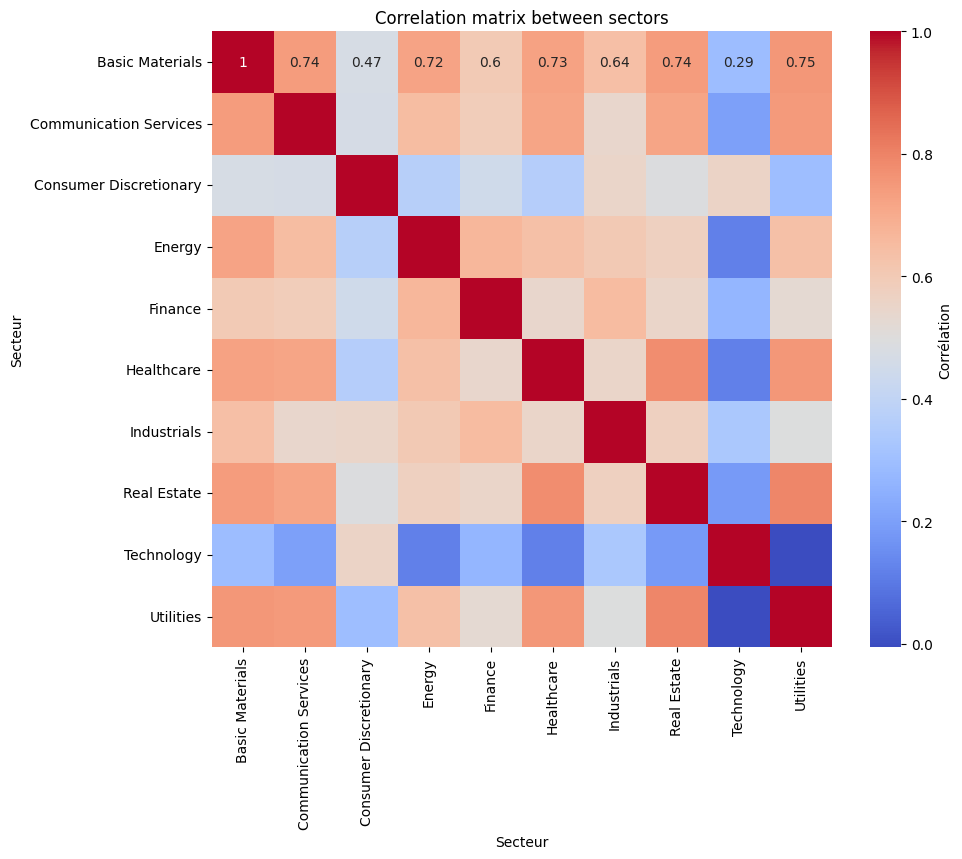

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(sector_correlation, annot=True, cmap="coolwarm", cbar_kws={'label': 'Corrélation'})
plt.title("Correlation matrix between sectors")
plt.show()

### Adjusted price trends by sector

In [ ]:
Secteurs = df['Secteur'].unique()

for sector in Secteurs:
    df_sector = df[df['Secteur'] == sector]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Date', y='Adj_Close', data=df_sector, label=f"Average trend - Sector : {sector}")
    
    for asset in df_sector['Ticker'].unique():
        df_asset = df_sector[df_sector['Ticker'] == asset]
        plt.plot(df_asset['Date'], df_asset['Adj_Close'], label=asset, linestyle='--')

    plt.title(f"Adjusted price trends for the sector {sector}")
    plt.xlabel("Date")
    plt.ylabel("Adjusted price (Adj_Close)")
    plt.legend()
    plt.show()

In [ ]:
for sector in Secteurs:
    print(f"Graphiques pour le secteur : {sector}")
    df_sector = df[df['Secteur'] == sector]
    assets = df_sector['Ticker'].unique()
    for asset_name in assets:
        df_asset = df_sector[df_sector['Ticker'] == asset_name]
        plt.figure(figsize=(14, 7))
        plt.plot(df_asset['Date'], df_asset['Adj_Close'], label='Prix ajusté', color='blue')
        plt.plot(df_asset['Date'], df_asset['SMA_20'], label='SMA 20 jours', color='orange')
        plt.plot(df_asset['Date'], df_asset['EMA_12'], label='EMA 12 jours', color='green')
        plt.title(f"Tendances pour {asset_name} dans le secteur {sector}")
        plt.xlabel("Date")
        plt.ylabel("Adjusted price (Adj Close)")
        plt.legend()
        plt.show()